Zadanie 1

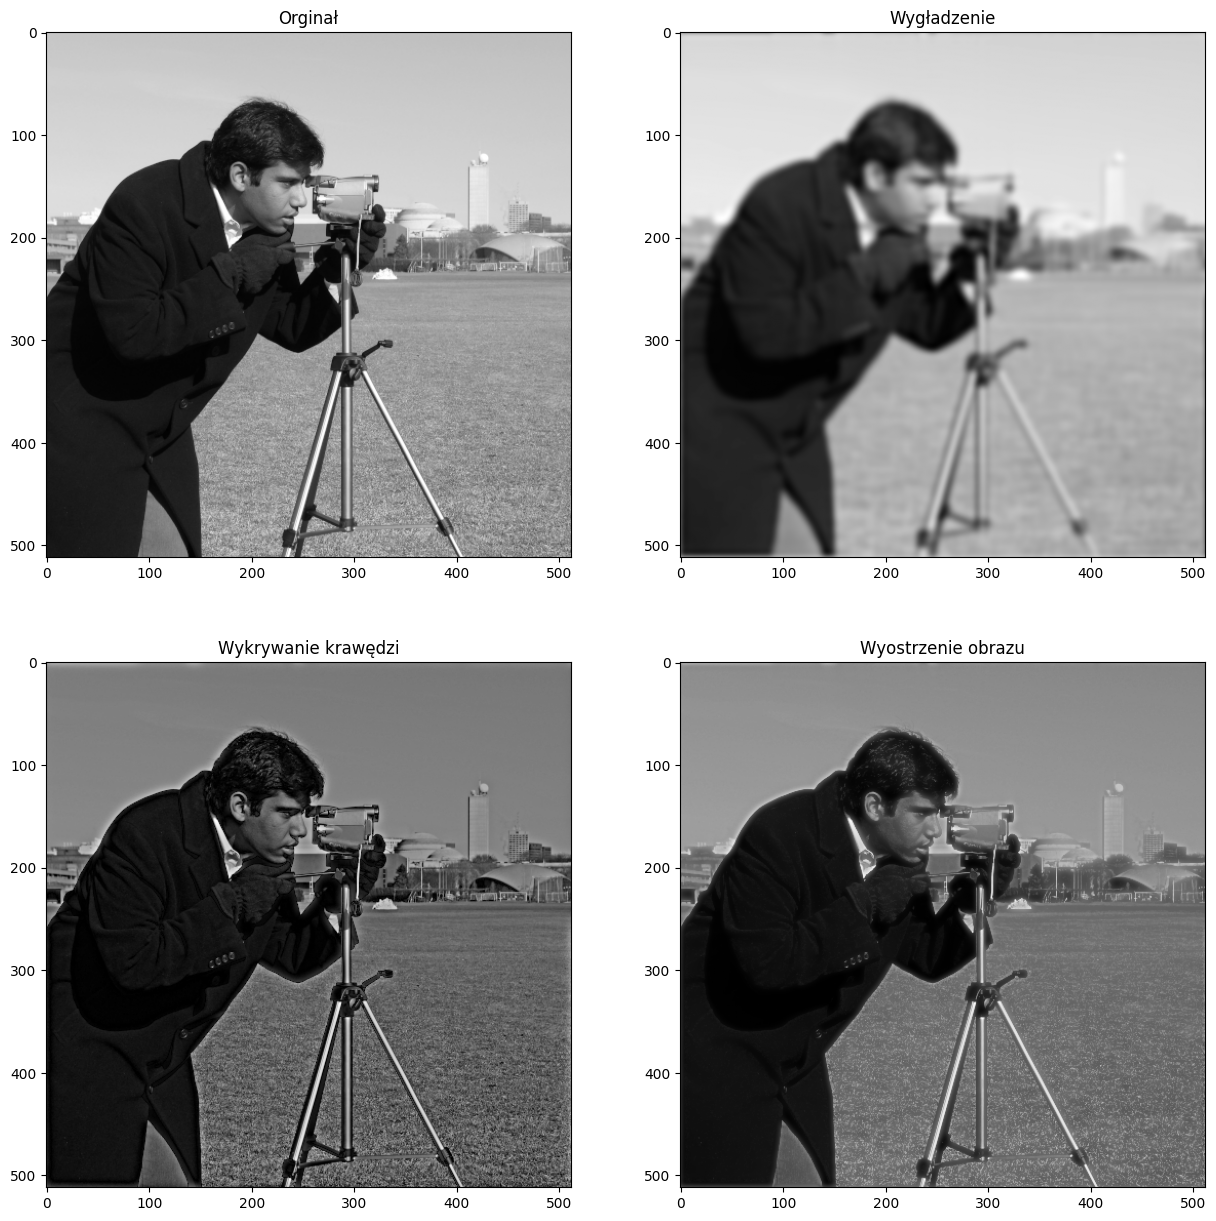

In [71]:
import cv2
import skimage
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft

plt.subplots(2, 2, figsize=(15, 15))
plt.subplot(2, 2, 1)
camera = skimage.data.camera() / 255.0
plt.imshow(camera, cmap='gray')
plt.title("Orginał")
plt.subplot(2, 2, 2)
plt.title("Wygładzenie")
ff = fft.fft2(camera)
mask = np.zeros_like(camera)
mask = cv2.circle(mask, (mask.shape[1] // 2, mask.shape[0] // 2), 330, 1, -1)
mask = skimage.filters.gaussian(mask, sigma=15)
ff = ff * (1 - mask)
iff = fft.ifft2(ff)
plt.imshow(np.log1p(np.abs(iff)), cmap='gray')
plt.subplot(2, 2, 3)
plt.title("Wykrywanie krawędzi")
ff = fft.fft2(camera)
ff = np.fft.fftshift(ff)
mask = np.zeros_like(camera)
mask = cv2.circle(mask, (mask.shape[1] // 2, mask.shape[0] // 2), 20, 1, -1)
mask = skimage.filters.gaussian(mask, sigma=15)
ff = ff * (1 - mask)
ff = np.fft.ifftshift(ff)
iff = np.fft.ifft2(ff)
plt.imshow(np.log1p(np.abs(iff)), cmap='gray')
plt.subplot(2, 2, 4)
plt.title("Wyostrzenie obrazu")
ff = fft.fft2(camera)
mask = np.zeros_like(camera)
mask = cv2.circle(mask, (mask.shape[1] // 2, mask.shape[0] // 2), 330, 1, -1)
mask = skimage.filters.gaussian(mask, sigma=15)
ff = ff * mask
iff = fft.ifft2(ff)
plt.imshow(np.log1p(np.abs(iff)) + camera, cmap='gray')
plt.show()

Zadanie 2

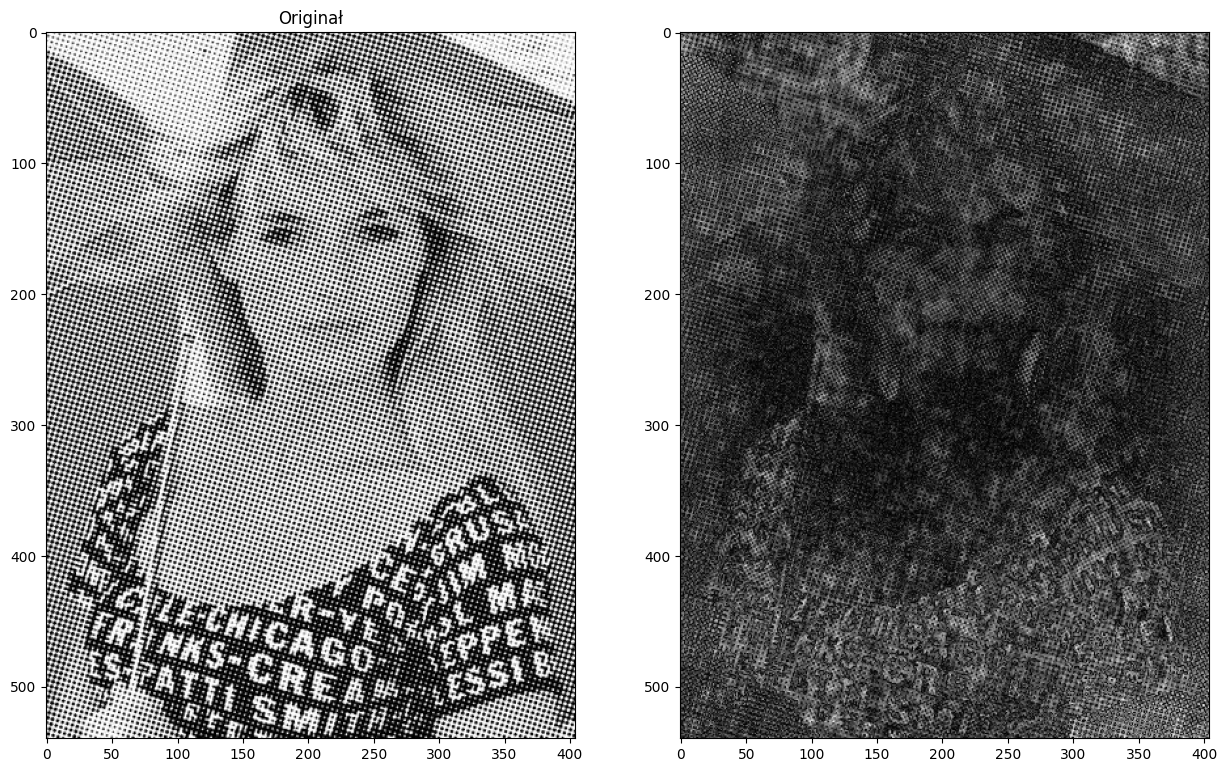

In [103]:
import scipy
img = skimage.io.imread('dane/gray1.jpg') / 255.0

def descreen(img):
    ff = fft.fft2(img)
    ff = fft.fftshift(ff)
    normal_v = np.log1p(np.abs(ff))
    normal_v = scipy.ndimage.minimum_filter(normal_v, size=3)
    phase = np.angle(ff)
    ff = np.exp(1j * phase) * np.exp(normal_v - np.max(normal_v))
    ff = fft.ifftshift(ff)
    ff = fft.ifft2(ff)
    return cv2.normalize(np.abs(ff),None,0,255,cv2.NORM_MINMAX).astype(np.uint8)

plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1,2,1)
plt.title('Originał')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
#plt.imshow(np.log1p(np.abs(descreen(img))),cmap='gray')
plt.imshow(descreen(img),cmap='gray')
plt.show()
